# Day 3 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly

## Kindly load the las file of F02-1_logs.las well from the data folder
## Perform the below Tasks:

>1. Plot well logs using matplotlib for every well-log in the las file 
2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.
3. Calculate the VP log from the DT sonic curve.
4. Calculate the VP log using AI and RHOB log. 
4. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes?   

In [1]:
import lasio
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
F02_1 = lasio.read(r"F:\GeoML-2\GeoML-2.0\10DaysChallenge\Dutch_F3_Logs\F02-1_logs.las")

In [9]:
df = F02_1.df()

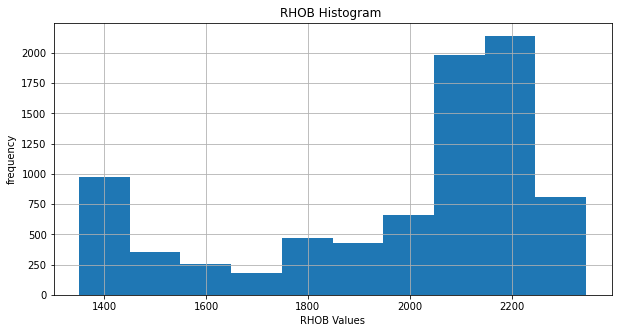

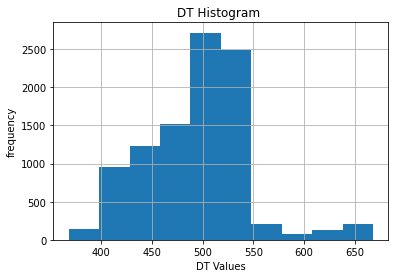

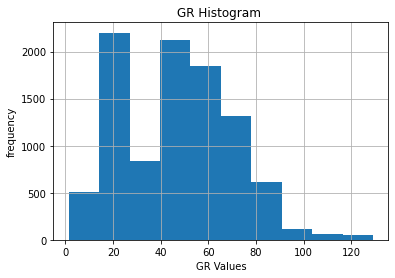

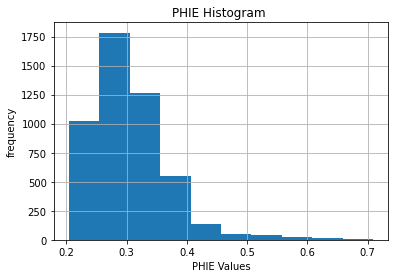

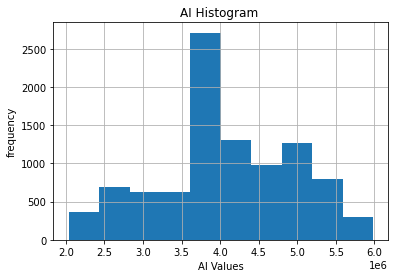

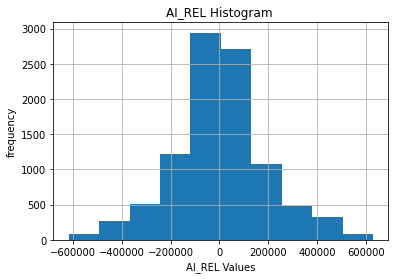

In [45]:
plt.figure(figsize=(10,5))
plt.hist(df.RHOB, bins = 10)
plt.title('RHOB Histogram ')
plt.xlabel('RHOB Values')
plt.ylabel('frequency')
plt.grid()
plt.show();
plt.hist(df.DT, bins = 10)
plt.title('DT Histogram ')
plt.xlabel('DT Values')
plt.ylabel('frequency')
plt.grid()
plt.show();
plt.hist(df.GR, bins = 10)
plt.title('GR Histogram ')
plt.xlabel('GR Values')
plt.ylabel('frequency')
plt.grid()
plt.show();
plt.hist(df.PHIE, bins = 10)
plt.title('PHIE Histogram ')
plt.xlabel('PHIE Values')
plt.ylabel('frequency')
plt.grid()
plt.show();
plt.hist(df.AI, bins = 10)
plt.title('AI Histogram ')
plt.xlabel('AI Values')
plt.ylabel('frequency')
plt.grid()
plt.show();
plt.hist(df.AI_REL, bins = 10)
plt.title('AI_REL Histogram ')
plt.xlabel('AI_REL Values')
plt.ylabel('frequency')
plt.grid()
plt.show();

In [16]:
df.describe(include='all')

,RHOB,DT,GR,AI,AI_REL,PHIE
count,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000
mean,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900
50%,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000
75%,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


In [43]:
df.quantile(0.1,axis = 0)

RHOB      1.411148e+03
DT        4.251383e+02
GR        1.569085e+01
AI        2.767478e+06
AI_REL   -2.295667e+05
PHIE      2.443500e-01
Name: 0.1, dtype: float64

In [44]:
df.quantile(0.1,axis = 0)

RHOB      1.411148e+03
DT        4.251383e+02
GR        1.569085e+01
AI        2.767478e+06
AI_REL   -2.295667e+05
PHIE      2.443500e-01
Name: 0.1, dtype: float64

In [27]:
F02_1.sections

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH STE")],
 'Well': [HeaderItem(mnemonic="STRT", unit="M", value="48.0", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="M", value="1500.0", descr="END DEPTH"),
  HeaderItem(mnemonic="STEP", unit="M", value="0.15", descr="INCREMENT DEPTH"),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="", descr=""),
  HeaderItem(mnemonic="WELL", unit="", value="F02-1", descr="WELL NAME"),
  HeaderItem(mnemonic="EKB", unit="M", value="30.0", descr="KELLY BUSHING ELEVAT"),
  HeaderItem(mnemonic="EGL", unit="M", value="0.0", descr="GROUND LEVEL ELEVATIO"),
  HeaderItem(mnemonic="EPD", unit="M", value="0.0", descr="PERMANENT DATUM ELEVA"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr=""),
  HeaderItem(mnemonic="LOC", unit="", value="X = 606554.00

In [28]:
vp =1000000/ F02_1['DT']
vp

array([1908.22032694, 1908.24763711, 1908.27458392, ..., 1861.53805486,
       1861.28581347, 1860.86983383])

In [30]:
vp_Ai=F02_1['AI']/F02_1['RHOB']
vp_Ai

array([          nan,           nan,           nan, ..., 1861.53388578,
       1861.2858141 , 1860.87317214])

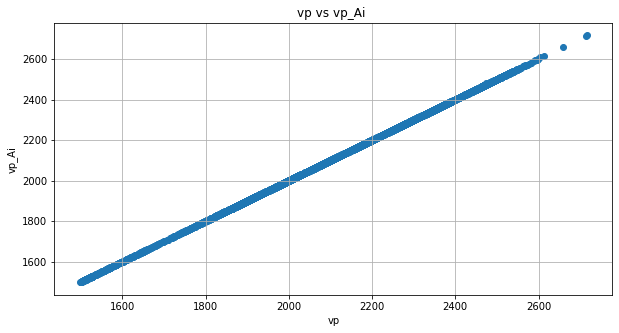

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(vp, vp_Ai)
plt.title('vp vs vp_Ai ')
plt.xlabel('vp')
plt.ylabel('vp_Ai')
plt.grid()
plt.show();